In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import sys
import os
import pandas as pd

b:\Projects\portfolio_management\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Config of the notebook
random_seed = 585

In [10]:
# Step 1: Download the full dataset to local storage
local_path = kagglehub.dataset_download("camnugent/sandp500")

# Step 2: Manually construct the full path to the file
csv_file = os.path.join(local_path, "all_stocks_5yr.csv")

# Step 3: Read the CSV using pandas (handle encoding and bad lines)
stock_data = pd.read_csv(csv_file, encoding="latin1", on_bad_lines="skip")


# download company info
comp_info = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "paytonfisher/sp-500-companies-with-financial-information",
    "financials.csv",
)


100%|██████████| 91.2k/91.2k [00:00<00:00, 345kB/s]


In [11]:
# Let's see if there is any company left out from the main stocks dataset
left = stock_data["Name"].drop_duplicates()
right = comp_info

res = pd.merge(left, right, how='left', left_on='Name', right_on='Symbol')
missing_count = len(res[res["Sector"].isna()])

print(f"Out of {len(res)} companies, {missing_count} are missing in the info dataset.")

Out of 505 companies, 0 are missing in the info dataset.


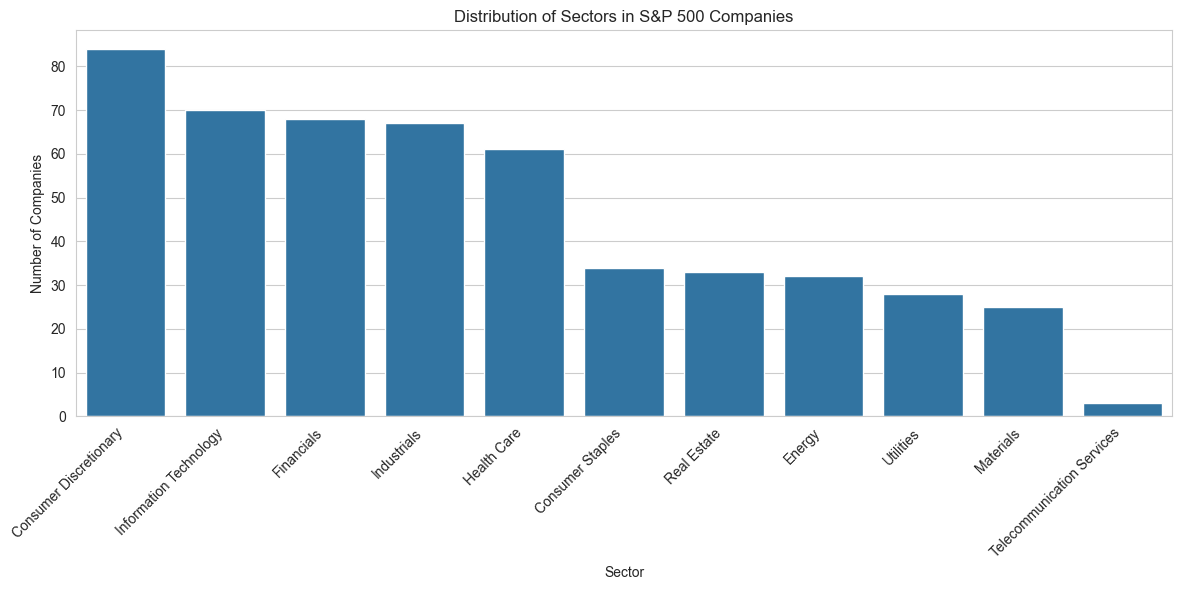

In [12]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for enhanced visualizations (optional but recommended)
import seaborn as sns

# Set a style for the plots (optional)
sns.set_style("whitegrid")

# Calculate the value counts for the 'Sector' column
sector_counts = comp_info['Sector'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6)) # Adjust figure size for better readability
sns.barplot(x=sector_counts.index, y=sector_counts.values)

# Add titles and labels
plt.title('Distribution of Sectors in S&P 500 Companies')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Display the plot
plt.show()

### Selected Companies

In [25]:
# sample 5 top sectors and select 5 random stocks
selected_sectors = list(sector_counts.index[:3])

selected_sector_comp = comp_info[comp_info.apply(lambda row: row["Sector"] in selected_sectors, axis=1)]

selected_companies = selected_sector_comp.groupby(by="Sector").sample(5, random_state=random_seed)
selected_companies[["Symbol", "Name", "Sector"]].reset_index(drop=True)

,Symbol,Name,Sector
0,CMG,Chipotle Mexican Grill,Consumer Discretionary
1,MHK,Mohawk Industries,Consumer Discretionary
2,GRMN,Garmin Ltd.,Consumer Discretionary
3,LEG,Leggett & Platt,Consumer Discretionary
4,ORLY,O'Reilly Automotive,Consumer Discretionary
5,BAC,Bank of America Corp,Financials
6,MS,Morgan Stanley,Financials
7,XL,XL Capital,Financials
8,CB,Chubb Limited,Financials
9,AXP,American Express Co,Financials


In [14]:
# selected_companies[["Symbol", "Name", "Sector"]].to_csv("selected_company_sample.csv")